<a href="https://colab.research.google.com/github/amitpant7/pulmonary-disease-classification/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%ls

sample_data/


# Importing all libraries. Add libraries here

In [ ]:
import os 
import shutil
import zipfile
import requests
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm          #for creating libraries  
from matplotlib.font_manager import FontProperties

%matplotlib inline
os.chdir('/content/drive/MyDrive')


<ipython-input-3-3e3f1645ba12>:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm          #for creating libraries


In [ ]:
os.getcwd()

'/content/drive/MyDrive'

This code checks if the file is in the path. If it isn't, the code downlads the file from the URL.

In [ ]:
url = "https://amitpant.com.np/dataset.zip"
file_name = 'dataset.zip'

if not os.path.isfile(file_name):
  resp = requests.get(url)

  with open(file_name,'wb') as file:
    total_length = int(resp.headers.get('content-length'))
    progress_bar = tqdm(total=total_length, unit='iB', unit_scale=True)

    if total_length is None:
      for chunk in resp:
        file.write(chunk)

    else:
      length = 0
      total_length = int(total_length)

      for chunk in resp:
        progress_bar.update(len(chunk))
        file.write(chunk)

else:
  print("File exists.")

  0%|          | 0.00/4.34G [00:00<?, ?iB/s]

The zip file contains 5 folders. If the folders are present in the working directory, the code returns exists. However, if any of the folders are missing, the code checks for the other folders and deletes them so that there are no duplicate folders. Then the zip file is extracted.

In [ ]:
# to check if all files exists, extract the zip file if the files doesn't exist

Normal = os.path.join('Normal')
TB_qatar = os.path.join('Tuberculosis-quatar')
pnemo_png = os.path.join('pnemo_png')
tb_shenzen = os.path.join('tb-shenzen')
tb_montgomery = os.path.join('tb-montgomery')

file_list = [Normal,TB_qatar,pnemo_png,tb_shenzen,tb_montgomery]
flag = 0

for i in file_list:
  isExist = os.path.exists(i)
  print(i,'exists :' ,str(isExist))
  if not isExist:
    flag = 1

if (flag == 1): 
  for i in file_list: 
    try:
      shutil.rmtree(os.path.join(i))
    except OSError as e:
      print("Error: %s - %s." % (e.filename, e.strerror))

  print('Extracting Zip file:')
  with zipfile.ZipFile(file_name , 'r') as zip_ref:
    for member in tqdm(zip_ref.infolist(), desc='Extracting '):
      zip_ref.extract(member)


Normal exists : True
Tuberculosis-quatar exists : True
pnemo_png exists : True
tb-shenzen exists : True
tb-montgomery exists : True


This code deletes all lung related folders.

import shutil

Normal = os.path.join('Normal')
TB_qatar = os.path.join('Tuberculosis-quatar')
pnemo_png = os.path.join('pnemo_png')
tb_shenzen = os.path.join('tb-shenzen')
tb_montgomery = os.path.join('tb-montgomery')

file_list = [Normal,TB_qatar,pnemo_png,tb_shenzen,tb_montgomery]
for i in file_list: 
    try:
      shutil.rmtree(os.path.join(i))
    except OSError as e:
      print("Error: %s - %s." % (e.filename, e.strerror))

In [ ]:
Normal_dataset = len(os.listdir(Normal))
Pneumonia_dataset = len(os.listdir(pnemo_png))
TB_dataset = len(os.listdir(tb_shenzen))+len(os.listdir(tb_montgomery))+len(os.listdir(TB_qatar))


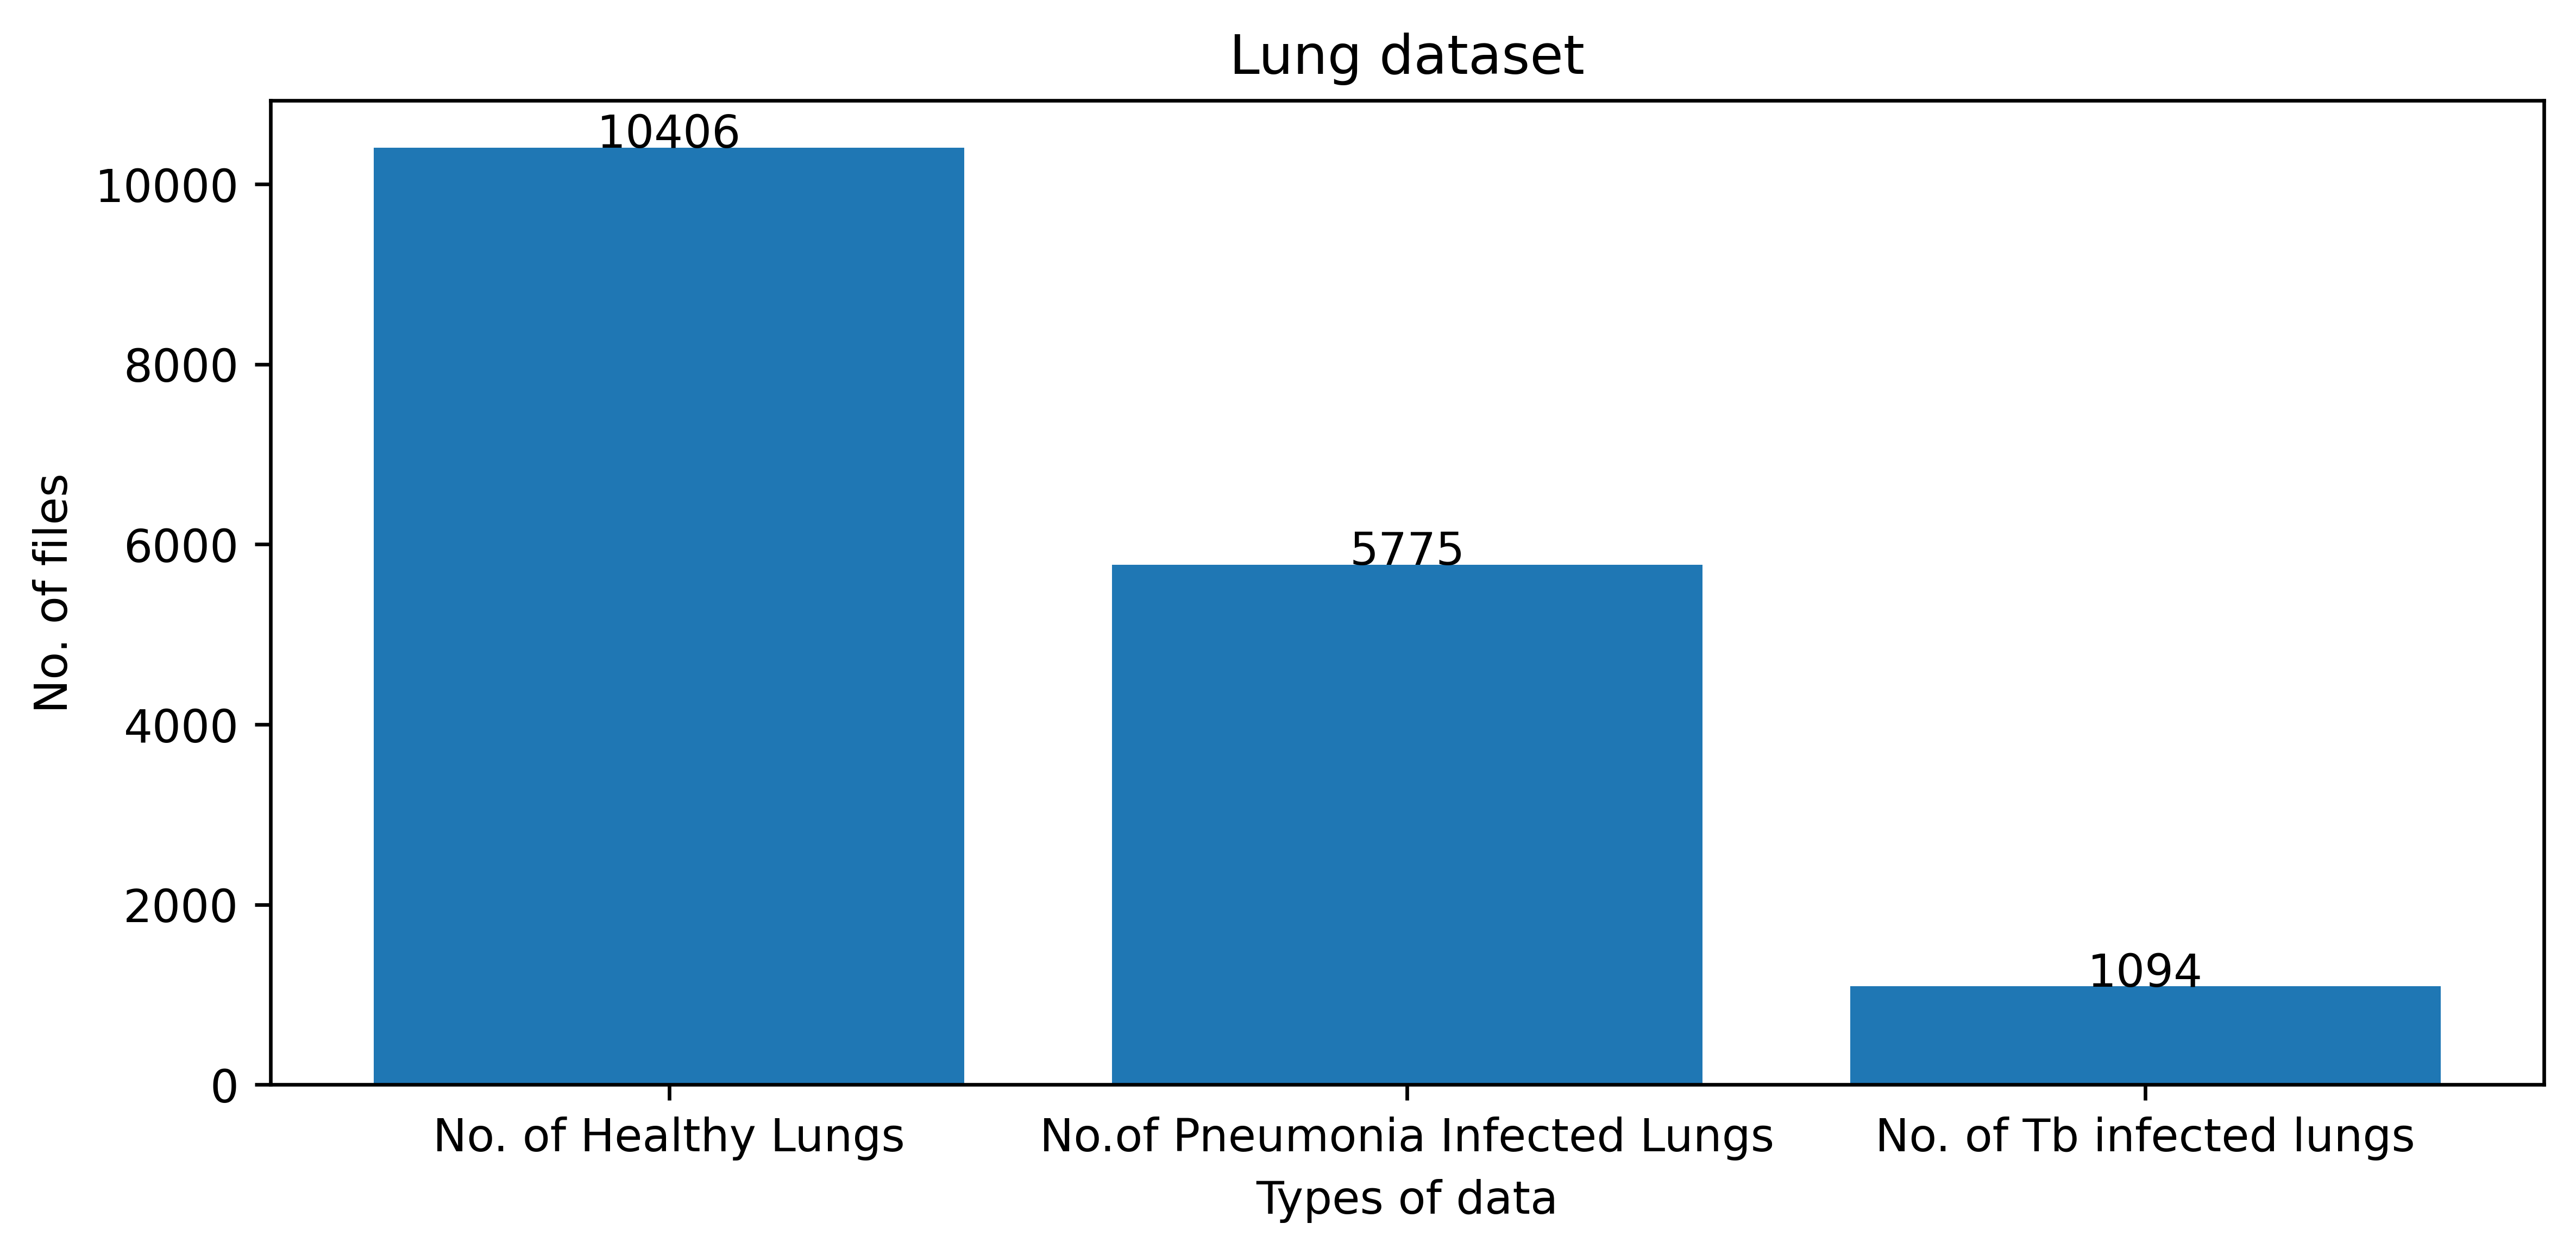

In [ ]:
from matplotlib import font_manager
font_files = font_manager.findSystemFonts(fontpaths='/content/drive/MyDrive/Times New Roman', fontext='ttf')
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = ['Times New Roman']

plt.figure(dpi=600,figsize = (9, 4))
plt.title('Lung dataset')
plt.xlabel('Types of data')
plt.ylabel('No. of files')

x = ['No. of Healthy Lungs','No.of Pneumonia Infected Lungs','No. of Tb infected lungs']
y= [Normal_dataset,Pneumonia_dataset,TB_dataset]
bar_colors = ['blue','red','orange']
plt.bar(x,y)

for i in range(len(x)):
  plt.text(i,y[i],y[i],ha = 'center')

plt.show()


In [ ]:
#Don't Run twice
#Change Dataset for 3 labels 
!pwd 
!mkdir tb 
!mv pnemo_png pnemo #rename

In [ ]:
#Remove 
#Move the images
!mv /content/drive/MyDrive/tb-montgomery/* tb 
!mv /content/drive/MyDrive/tb-shenzen/* tb
!mv /content/drive/MyDrive/Tuberculosis-quatar/* tb


In [ ]:
#Removing the directories
!rmdir /content/drive/MyDrive/tb-montgomery
!rmdir /content/drive/MyDrive/tb-shenzen
!rmdir /content/drive/MyDrive/Tuberculosis-quatar/


In [ ]:
#Moving to one folder
!mkdir Dataset
!mv /content/drive/MyDrive/pnemo /content/drive/MyDrive/Dataset/
!mv /content/drive/MyDrive/tb /content/drive/MyDrive/Dataset/
!mv /content/drive/MyDrive/Normal /content/drive/MyDrive/Dataset/